<a href="https://colab.research.google.com/github/shubhamksingh1/GANs/blob/main/Jupyter_Notebooks/DCGAN_Pneumonia_Lung_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tensorflow Version Selection

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


### Kaggle Dataset Download into colab session

In [ ]:
# Install the Kaggle library

! pip install kaggle

In [ ]:
pwd

'/content'

In [ ]:
# Make a directory named “.kaggle”

! mkdir ~/.kaggle

In [ ]:
# Copy the “kaggle.json” into this new directory

# ! cp kaggle.json ~/.kaggle/
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# Allocate the required permission for this file.

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading Competitions dataset:
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
# ! kaggle competitions download <name-of-competition>


100% 2.29G/2.29G [00:12<00:00, 144MB/s]
100% 2.29G/2.29G [00:12<00:00, 190MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip  \*.zip  && rm *.zip 

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

### Imports

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

### Dataset Preprocessing

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 224
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/chest_xray/chest_xray/train')
test = get_training_data('/content/chest_xray/chest_xray/test')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [ ]:
train.shape

(5216, 2)

In [ ]:
test.shape

(624, 2)

In [ ]:
train[0][0].shape

(224, 224)

In [ ]:
train[0][1]

0

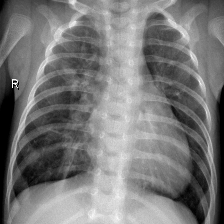

In [ ]:
cv2_imshow(train[0][0])

In [ ]:
train[-1][1]

1

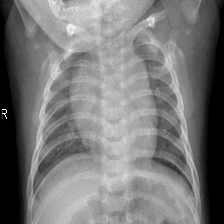

In [ ]:
cv2_imshow(train[-1][0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


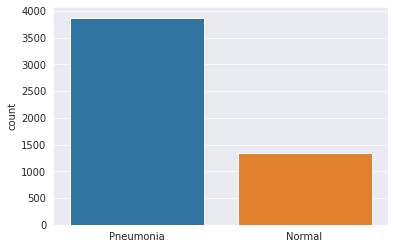

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)   

Text(0.5, 1.0, 'NORMAL')

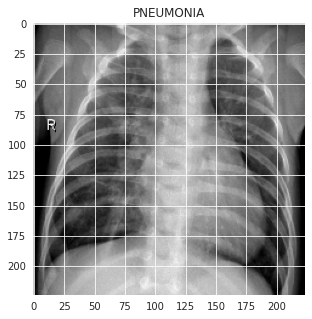

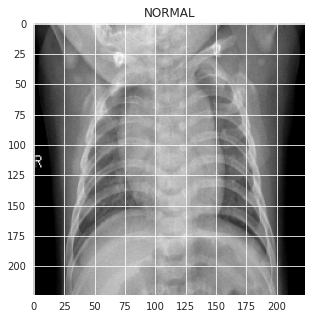

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [ ]:
type(x_train)

list

In [ ]:
train_x = np.array(x_train)
train_y = np.array(y_train)
test_x = np.array(x_test)
test_y = np.array(y_test)

In [ ]:
train_x.shape,test_x.shape

((5216, 224, 224), (624, 224, 224))

In [ ]:
train_y.shape,test_y.shape

((5216,), (624,))

In [ ]:
print(pd.Series(train_y).value_counts())

0    3875
1    1341
dtype: int64


#### Dry Run

In [ ]:
idx1, = np.where(train_y == 1)  #normal  25%
idx0, = np.where(train_y == 0)  #pneumonia  75%

In [ ]:
type(idx1)

numpy.ndarray

In [ ]:
idx1

array([3875, 3876, 3877, ..., 5213, 5214, 5215])

In [ ]:
idx1.shape,idx0.shape

((1341,), (3875,))

In [ ]:
num_labeled = 500

In [ ]:
idx1_ratio = int(0.25 * num_labeled)
idx0_ratio = int(0.75 * num_labeled)

In [ ]:
idx_n = np.random.choice(idx1, idx1_ratio)
idx_pn = np.random.choice(idx0, idx0_ratio)

In [ ]:
idx_n.shape,idx_pn.shape

((125,), (375,))

In [ ]:
# idx = np.random.randint(0, 4000, 1000)
idx = np.concatenate((idx_n, idx_pn))

In [ ]:
type(idx)

numpy.ndarray

In [ ]:
type(idx[0])

numpy.int64

In [ ]:
type(x_train)

list

In [ ]:
train_x[idx]

array([[[  7,   6,   6, ...,  11,  10,  10],
        [  6,   6,   6, ...,   9,   9,   9],
        [  5,   6,   7, ...,  10,   8,   9],
        ...,
        [  7,   6,   6, ...,   9,   7,   8],
        [  6,   5,   5, ...,   9,   8,   8],
        [  0,   0,   0, ...,   9,   9,   9]],

       [[ 20,  21,  29, ...,  22,   6,   0],
        [ 17,  19,  30, ...,  20,   0,   0],
        [ 15,  17,  26, ...,  19,   1,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[110, 138, 170, ...,  78,  77,  50],
        [156, 149, 135, ...,  78,  77,  73],
        [124, 139, 168, ...,  79,  78,  73

In [ ]:
idxtest = np.random.randint(0, 1000, 32)

In [ ]:
idxtest

array([240, 948, 203, 498, 696, 483, 124, 314, 823,  60, 822, 201, 500,
       386, 221,  68, 778,  45, 489, 417, 790, 330, 201, 470, 162,  23,
       907, 979, 687, 319, 108, 295])

In [ ]:
type(idxtest[0])

numpy.int64

In [ ]:
imgs = train_x[idxtest]
labels = train_y[idxtest]

In [ ]:
set(list(labels))

{0, 1}

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
print(pd.Series(labels).value_counts())

0    375
1    125
dtype: int64


In [ ]:
type(idx1)

numpy.ndarray

In [ ]:
check = np.random.randint(0, 1000, 32)
type(check)

numpy.ndarray

### Taking Subset

In [ ]:
num_labeled = 1000
idx1, = np.where(train_y == 1)  #normal  25%
idx0, = np.where(train_y == 0)  #pneumonia  75%

In [ ]:
def batch_labeled(batch_size,train_x,train_y,idx1,idx0):
    # Get a random batch of labeled images and their labels to be used in SGAN
    idx1_ratio = int(0.25 * num_labeled)
    idx0_ratio = int(0.75 * num_labeled)
    idx_n = np.random.choice(idx1, idx1_ratio)
    idx_pn = np.random.choice(idx0, idx0_ratio)
    idx_combo = np.concatenate((idx_n, idx_pn))
    idx = np.random.choice(idx_combo, batch_size)
    imgs = train_x[idx]
    labels = train_y[idx]
    return imgs, labels

In [ ]:
def sample_set(train_x,train_y,idx1,idx0):
    # Get a random batch of labeled images and their labels
    idx1_ratio = int(0.25 * num_labeled)
    idx0_ratio = int(0.75 * num_labeled)
    idx_n = np.random.choice(idx1, idx1_ratio)
    idx_pn = np.random.choice(idx0, idx0_ratio)
    idx = np.concatenate((idx_n, idx_pn))
    imgs = train_x[idx]
    labels = train_y[idx]
    return imgs, labels

In [ ]:
trainXsubset,trainYsubset = sample_set(train_x,train_y,idx1,idx0)

In [ ]:
trainXsubset.shape,trainYsubset.shape

((1000, 224, 224), (1000,))

In [ ]:
print(pd.Series(trainYsubset).value_counts())

0    750
1    250
dtype: int64


In [ ]:
img_rows = 224
img_cols = 224
channels = 1

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100


### Generator

In [ ]:
def build_generator(z_dim):

    model = Sequential()

    # Reshape input into 7x7x1024 tensor via a fully connected layer
    model.add(Dense(1024 * 7 * 7, input_dim=z_dim))
    model.add(Reshape((7, 7, 1024)))

    # Transposed convolution layer, from 7x7x1024 into 14x14x512 tensor
    model.add(Conv2DTranspose(512, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Transposed convolution layer, from 14x14x512 into 28x28x256 tensor
    model.add(Conv2DTranspose(256, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

     # Transposed convolution layer, from 28x28x256 into 56x56x128 tensor
    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))


    # Transposed convolution layer, from 56x56x128 into 56x56x64 tensor
    model.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))


 # Transposed convolution layer, from 56x56x64 into 112x112*32 tensor
    model.add(Conv2DTranspose(32, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

 # Transposed convolution layer, from 112x112*32 into 224x224*1 tensor
    model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Activation('tanh'))

    print(model.summary())
    return model

### Discriminator

In [ ]:
def build_discriminator(img_shape):

    model = Sequential()

    # Convolutional layer, from 224x224x1 into 112x112x32 tensor
    model.add(
        Conv2D(32,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Convolutional layer, from 112x112x32 into 56x56x64 tensor
    model.add(
        Conv2D(64,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

     # Convolutional layer, from 56x56x64 into 28*28*128 tensor
    model.add(
        Conv2D(128,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Convolutional layer, from 28x28x128 into 14x14x256 tensor
    model.add(
        Conv2D(256,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Convolutional layer, from 14x14x256 into 7x7x512 tensor
    model.add(
        Conv2D(512,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))


    # Convolutional layer, from 7x7x512 tensor into 3x3x1024 tensor
    model.add(
        Conv2D(1024,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Droupout
    # model.add(Dropout(0.5)

    # Output layer with sigmoid activation
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    return model

### Build the Model

In [ ]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [ ]:
# Build and compile the Discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# Build the Generator
generator = build_generator(z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 32)      320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_______________________________________

## Training

In [ ]:
losses = []
accuracies = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval,train_x,train_y,test_x,test_y):

    # Load the MNIST dataset
    (X_train, _), (_, _) = (train_x,train_y),(test_x,test_y)

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            sample_images(generator)
            # sample_images(generator,iteration)


In [ ]:
def sample_images(generator, iteration = 1,image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(896, 896),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    # fig.savefig("%d_%d_%d.png" % ( iteration, i,j))
    # plt.show()

### Train the Model and Inspect Output

Note that the `'Discrepancy between trainable weights and collected trainable'` warning from Keras is expected. It is by design: The Generator's trainable parameters are intentionally held constant during Discriminator training, and vice versa.

In [ ]:
# Set hyperparameters
iterations =  5000   #20000
batch_size = 128
sample_interval = 250      #1000

# Train the DCGAN for the specified number of iterations
train(iterations, batch_size, sample_interval,trainXsubset,trainYsubset,test_x,test_y)


/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


250 [D loss: 0.000003, acc.: 100.00%] [G loss: 0.000003]
500 [D loss: 0.000003, acc.: 100.00%] [G loss: 0.000077]
750 [D loss: 0.000000, acc.: 100.00%] [G loss: 0.018390]
1000 [D loss: 0.000007, acc.: 100.00%] [G loss: 0.027085]
1250 [D loss: 0.000003, acc.: 100.00%] [G loss: 0.000533]
1500 [D loss: 0.000009, acc.: 100.00%] [G loss: 0.226520]
1750 [D loss: 0.000004, acc.: 100.00%] [G loss: 0.031105]
2000 [D loss: 0.000001, acc.: 100.00%] [G loss: 3.219354]
2250 [D loss: 0.000007, acc.: 100.00%] [G loss: 0.052065]
2500 [D loss: 0.000002, acc.: 100.00%] [G loss: 0.074161]
2750 [D loss: 0.000009, acc.: 100.00%] [G loss: 1.786650]
3000 [D loss: 0.000001, acc.: 100.00%] [G loss: 12.408514]
3250 [D loss: 0.000001, acc.: 100.00%] [G loss: 14.165527]
3500 [D loss: 0.000000, acc.: 100.00%] [G loss: 5.519338]
3750 [D loss: 0.000001, acc.: 100.00%] [G loss: 11.009342]
4000 [D loss: 0.000005, acc.: 100.00%] [G loss: 11.759825]
4250 [D loss: 0.000000, acc.: 100.00%] [G loss: 8.578805]
4500 [D loss:

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

NameError: ignored

In [ ]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()

NameError: ignored